<a href="https://colab.research.google.com/github/aaperei/data-science/blob/main/mlp_house_pricing_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão utilizando Rede Neural MLP - `USA House Pricing Dataset`
### Alison Augusto Miranda Pereira - UNIFESP - 2021

## Descrição do problema
O presente trabalho tem o objetivo de explorar o algoritmo de regressão da rede MPL, por meio dos dados do precificaçao de casas nos Estados Unidos da América. O atributo meta, `Price`, representa o valor de cada casa.

Para a realização da regressão, utilizou-se o algoritmo original da rede neural MLP - SGD.

Os dados utilizados neste experimento estão disponíveis no site Kaggle, através do endereço [https://www.kaggle.com/faressayah/linear-regression-house-price-prediction/data?select=USA_Housing.csv](https://www.kaggle.com/faressayah/linear-regression-house-price-prediction/data?select=USA_Housing.csv).

A seguir, vamos importar o arquivo csv refente aos preços das casas.

In [172]:
# load student performance dataset from csv file

import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# import data from csv file
housing_dataframe = pd.read_csv('USA_Housing.csv')

housing_dataframe

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


## Preparação dos dados

A seguir, é feito um pequeno tratamento e separação dos dados inicias em três fases: 
- Treinamento - 80%
- Validação - 10%
- Teste - 10%

In [173]:
# Percentage used for training, validation and test
train_perc = 0.8
validation_perc=0.1
test_perc = 0.1

# -----------------------------------------------------------------------#
# Split initial original dataframe in two (input and output) and convert to list format
aux = housing_dataframe
output_dataframe = aux['Price'].to_frame()
input_dataframe = aux.drop(columns=['Price', 'Address'])
output_list = output_dataframe.values.tolist()
input_list = input_dataframe.values.tolist()

# -----------------------------------------------------------------------#
# Split my data in three parts - Trainning, validation and Test
number_of_samples = len(aux)
index1 = int(train_perc * number_of_samples)
index2 = int((train_perc + validation_perc) * number_of_samples)

input_train = input_list[0:index1]
input_validation = input_list[index1+1:index2]
input_test = input_list[index2+1:]

output_train = output_list[0:index1]
output_validation = output_list[index1+1:index2]
output_test = output_list[index2+1:]


## Regressão utilizando MLP Regressor

Optou-se por utilizar a implementação do regressor MLP da biblioteca python `scikit-learn`. Detalhes podem ser encontrados na documentação oficial disponível em [https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html).

Iremos utilizar o algoritmo `SGD`, afim de testarmos o a interferência do parâmetro `momentum` no treinamento do modelo.

A seguir é demonstrado como é feito o processo de treinamento e predição da rede MPL.

In [174]:
from sklearn.neural_network import MLPRegressor

# Function to calculate the model error
def calculate_mean_error(model, input, expected_output):
  predict = model.predict(input)
  sample_size = len(predict)
  sum_error = 0

  for i in range(sample_size):
    error = abs(predict[i] - expected_output[i][0])
    error = error/expected_output[i][0]
    sum_error = sum_error + error

  return sum_error/sample_size

# Function to initilize the SGD MLP
def create_sgd_mlp(momentum=0.9, alpha=0.0, hidden_layer_sizes=(100), max_iter=500):
  return MLPRegressor(solver='sgd', 
                      alpha=alpha, 
                      learning_rate_init=0.01, 
                      hidden_layer_sizes=hidden_layer_sizes, 
                      random_state=1, 
                      momentum=momentum, 
                      max_iter=max_iter)

# -----------------------------------------------------------------------#
# Train the MLP Classifier
model = create_sgd_mlp()
model.fit(input_train, output_train)

# -----------------------------------------------------------------------#
# Validate the MLP Classifier trainning
print("Expected result[0]={}, found result[0]={}".format(model.predict([input_validation[0]]), output_validation[0]))
print("Erro médio percentual do modelo={}%".format(calculate_mean_error(model, input_validation, output_validation)*100))



Expected result[0]=[1236742.88991511], found result[0]=[1214689.183704473]
Erro médio percentual do modelo=29.704409977870778%


## Termo de momentum

O termo de momentum (informado durante a criação da rede neural MLP) é responsável por reduzir a incidência de instabilidade durante a fase de treinamento, por gerar uma inércia na descida do vetor gradiente. É um valor entre `0` e `1`, utilizado somente quando aplicamos o algoritmo SGD.

A seguinte, é demonstrado o treinamento da rede MLP para os seguintes valores de momentum: `0.1, 0.2, 0.3,  0.4, 0.5, 0.6, 0.7, 0.8, 0.9 e 1.0`. 

Pelos gráficos, nota-se que o termo `momentum` tem pouco interferência no modelo em questão. Entretanto, quando ultrapassamos o valor de 0.9, o erro do modelo aumenta drasticamente. Para valores menores ou iguais a 0.9, o modelo se comporta de forma estável com a variação do `momentum`.

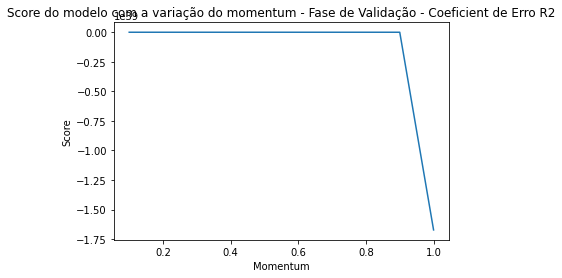

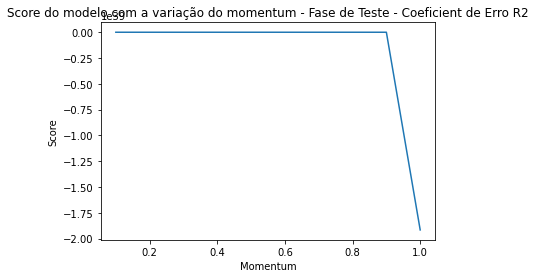

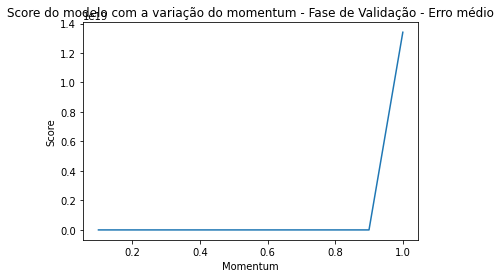

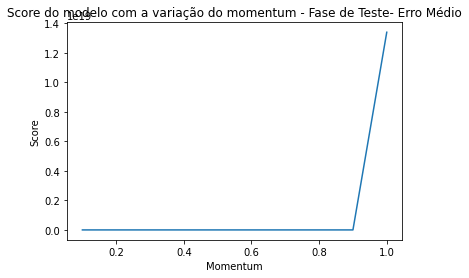

In [175]:
import matplotlib.pyplot as plt

def plot_momentum(step, score):
  plt.plot(momentum_list, score)
  plt.title('Score do modelo com a variação do momentum - Fase de {}'.format(step))
  plt.xlabel('Momentum')
  plt.ylabel('Score')
  plt.show()

momentum_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 , 1.0]
range_momentum = range(len(momentum_list))
accuracy_momentum_validation = list(range_momentum)
accuracy_momentum_test = list(range_momentum)
mean_error_validation=list(range_momentum)
mean_error_test=list(range_momentum)
for i in range_momentum:
  model = create_sgd_mlp(momentum=momentum_list[i])
  model.fit(input_train, output_train)
  accuracy_momentum_validation[i] = model.score(input_validation, output_validation)
  accuracy_momentum_test[i] = model.score(input_test, output_test)
  mean_error_validation[i] = calculate_mean_error(model, input_validation, output_validation)
  mean_error_test[i] = calculate_mean_error(model, input_test, output_test)

plot_momentum("Validação - Coeficient de Erro R2", accuracy_momentum_validation)
plot_momentum("Teste - Coeficient de Erro R2", accuracy_momentum_test)
plot_momentum("Validação - Erro médio", mean_error_validation)
plot_momentum("Teste- Erro Médio", mean_error_test)


## Variando a regulação da MPL - paramêtro alpha

`Alpha` é um parâmetro para o termo de regularização, também conhecido como termo de penalidade, que combate o *overfitting*  restringindo o tamanho dos pesos. O aumento de `alfa` pode corrigir a alta variância (um sinal de *overfitting*), incentivando pesos menores, resultando em um gráfico de limite de decisão que aparece com curvaturas menores. Da mesma forma, diminuir o parâmetro `alfa` pode corrigir um *bias* alto (um sinal de *underfitting*), incentivando pesos maiores, resultando potencialmente em um limite de decisão mais complexo.

***Referência: [https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html)***

Para o problema em questão, nota-se uma ligeira melhora na acurácia do modelo, conforme vamos aumenta o valor de alpha.

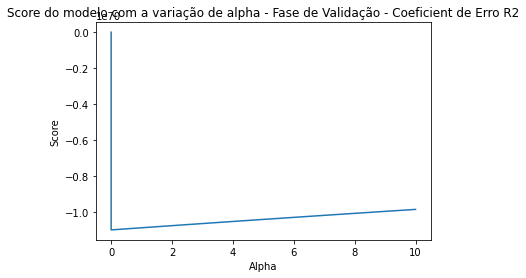

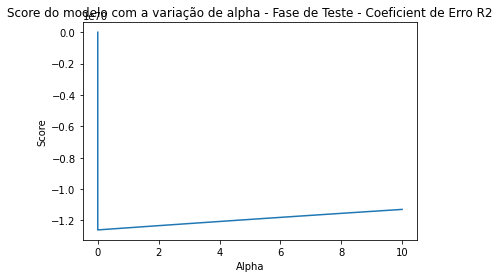

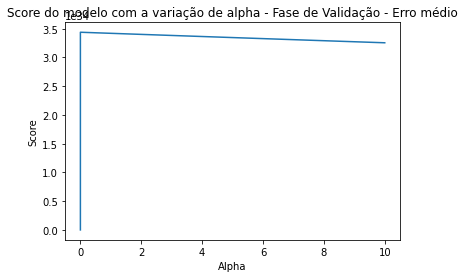

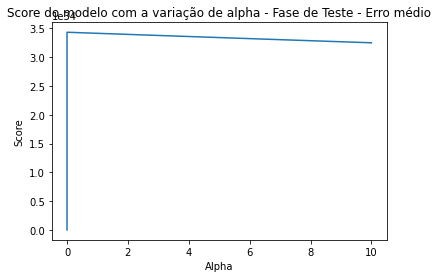

In [176]:
import matplotlib.pyplot as plt

def plot_alpha(step, score):
  plt.plot(alpha_list, score)
  plt.title('Score do modelo com a variação de alpha - Fase de {}'.format(step))
  plt.xlabel('Alpha')
  plt.ylabel('Score')
  plt.show()

alpha_list = [0.0, 0.0001, 0.0002, 0.0003, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0 , 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
range_alpha = range(len(alpha_list))
accuracy_alpha_validation = list(range_alpha)
accuracy_alpha_test = list(range_alpha)
mean_error_validation=list(range_alpha)
mean_error_test=list(range_alpha)

for i in range_alpha:
  model = create_sgd_mlp(alpha=alpha_list[i])
  model.fit(input_train, output_train)
  accuracy_alpha_validation[i] = model.score(input_validation, output_validation)
  accuracy_alpha_test[i] = model.score(input_test, output_test)
  mean_error_validation[i] = calculate_mean_error(model, input_validation, output_validation)
  mean_error_test[i] = calculate_mean_error(model, input_test, output_test)
  

plot_alpha("Validação - Coeficient de Erro R2", accuracy_alpha_validation)
plot_alpha("Teste - Coeficient de Erro R2", accuracy_alpha_test)
plot_alpha("Validação - Erro médio", mean_error_validation)
plot_alpha("Teste - Erro médio", mean_error_test)

## Variando a topologia da Rede MLP

A seguir, vamos explorar diferentes topologias de rede para o problema em questão, utilizando os valores padrões de `alpha` e `momentum`.

Topologias aplicadas:


1. (5, 2)
2. (2, 5)
3. (2, 10)
4. (10, 5)
5. (5, 5)
6. (20, 20)

De forma geral, a variação da topologia do modelo teve pouca interfência no acurácia. Mesmo, quando aumenta 

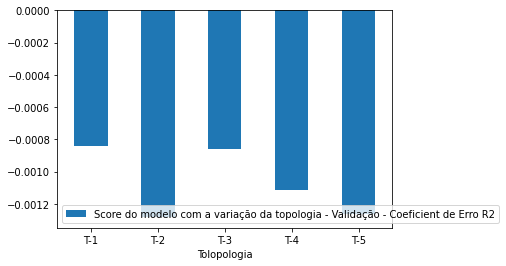

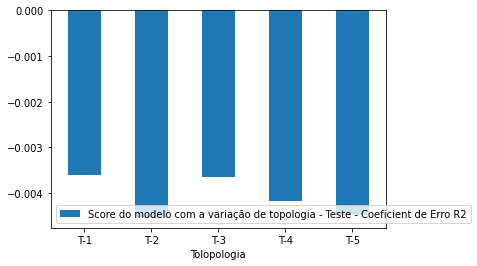

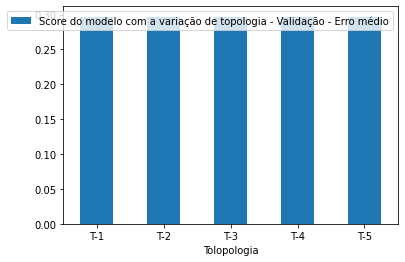

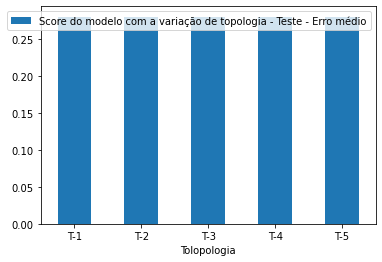

In [177]:
import matplotlib.pyplot as plt

def plot_topol(step, accuracy_topol):
  df = pd.DataFrame({'Tolopologia':['T-1', 'T-2', 'T-3', 'T-4', 'T-5'], step:accuracy_topol})
  ax = df.plot.bar(x='Tolopologia', y=step, rot=0)


topol_list = [(5,2), (2, 5), (2, 10), (10, 2), (5, 5)]
range_topol = range(len(topol_list))
accuracy_topol_validation = list(range_topol)
accuracy_topol_test = list(range_topol)
mean_error_validation=list(range_topol)
mean_error_test=list(range_topol)

for i in range_topol:
  model = create_sgd_mlp(hidden_layer_sizes=topol_list[i])
  model.fit(input_train, output_train)
  accuracy_topol_validation[i] = model.score(input_validation, output_validation)
  accuracy_topol_test[i] = model.score(input_test, output_test)
  mean_error_validation[i] = calculate_mean_error(model, input_validation, output_validation)
  mean_error_test[i] = calculate_mean_error(model, input_test, output_test)

plot_topol("Score do modelo com a variação da topologia - Validação - Coeficient de Erro R2", accuracy_topol_validation)
plot_topol("Score do modelo com a variação de topologia - Teste - Coeficient de Erro R2", accuracy_topol_test)
plot_topol("Score do modelo com a variação de topologia - Validação - Erro médio", mean_error_validation)
plot_topol("Score do modelo com a variação de topologia - Teste - Erro médio", mean_error_test)